In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\prach\Desktop\ML projects\NLP - Krish Naik\train.csv")

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
#Drop indeendent feature
X=df.drop('label',axis=1)

In [8]:
X.head(2)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...


In [10]:
#Get the Dependent features
y=df['label']
y.head(2)

0    1
1    0
Name: label, dtype: int64

In [12]:
df.shape

(20800, 5)

In [13]:
#import countvectoriser(also called bag of words)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [16]:
#dropping null values
df=df.dropna()

In [15]:
df.head(3)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [18]:
#df post clenaing 
df.shape

(18285, 5)

In [19]:
#saving the df in messages
messages=df.copy()

In [20]:
#now after dropping the null values the indexes migh be inconsistent thus we will have to reset it
messages.reset_index(inplace=True)

In [21]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


# TEXT PREPROCESSING

In [24]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [26]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [27]:
#Apply bow
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))  #take combination of 2 or 3 words
X = cv.fit_transform(corpus).toarray()

In [31]:
X.shape

(18285, 5000)

In [32]:
y=messages['label']

In [33]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [35]:
#gets top 20 feature names
cv.get_feature_names()[:20]

#what ng gram has done is that: a combination of 1/2/3 words

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [36]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [38]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [40]:
count_df.head(10)

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
count_df.shape

(12250, 5000)

In [43]:
import matplotlib.pyplot as plt

In [44]:
#manual way of plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MULTINOMIAL NAIVE BAYES

In [46]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools


accuracy:   0.902
Confusion matrix, without normalization


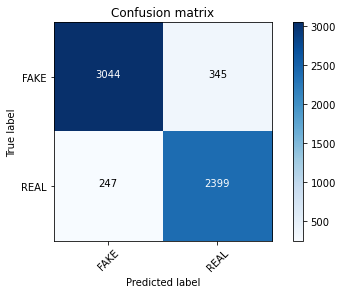

In [48]:
classifier.fit(X_train, y_train)

#predicting on test set
pred = classifier.predict(X_test)

#getting accurcay score
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

#plotting and calling confusion matrix function
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Passive Aggressive Classifier Algorithm

In [74]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(C = 0.5, random_state = 10)  

Random_state is basically used for reproducing your problem the same every time it is run. 
If you do not use a random_state in train_test_split, every time you make the split you might get a
    different set of train and test data points and will not help you in debugging in case you get an issue.

accuracy:   0.921
Confusion matrix, without normalization


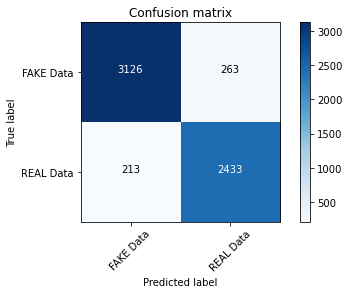

In [75]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Observation: 
    1. with random state as 5- accurcay is 0.920
    2. with random state as 10- accurcay is 0.921
    3. with random state as 15- accurcay is 0.920
    4. with random state as 5- accurcay is 0.919
    
    With changing random states from 10 to 100 accurcay varies between 0.919 and 0.920

# Multinoimal classfier with Hyperparameter

In [76]:
classifier=MultinomialNB(alpha=0.1)

In [77]:
previous_score=0

for alpha in np.arange(0,1,0.1):
    
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\prach\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [78]:
previous_score=0

for alpha in np.arange(0,1,0.01):
    
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\prach\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.01, Score : 0.8964374482187241
Alpha: 0.02, Score : 0.8980944490472246
Alpha: 0.03, Score : 0.8989229494614748
Alpha: 0.04, Score : 0.8995857497928749
Alpha: 0.05, Score : 0.9000828500414251
Alpha: 0.06, Score : 0.9007456503728252
Alpha: 0.07, Score : 0.9012427506213753
Alpha: 0.08, Score : 0.9017398508699255
Alpha: 0.09, Score : 0.9015741507870754
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.11, Score : 0.9022369511184756
Alpha: 0.12, Score : 0.9022369511184756
Alpha: 0.13, Score : 0.9022369511184756
Alpha: 0.14, Score : 0.9024026512013256
Alpha: 0.15, Score : 0.9024026512013256
Alpha: 0.16, Score : 0.9025683512841757
Alpha: 0.17, Score : 0.9027340513670257
Alpha: 0.18, Score : 0.9027340513670257
Alpha: 0.19, Score : 0.9025683512841757
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.21, Score : 0.9022369511184756
Alpha: 0.22, Score : 0.9022369511184756
Alpha: 0.23, Score : 0.9022369511184756
Alpha: 0.24, Score : 0.9025683512841757
Alp

In [80]:
#Get Features names
feature_names = cv.get_feature_names()

classifier.coef_[0]

array([ -9.09238698,  -8.62163213,  -9.09238698, ..., -10.70987323,
        -8.90973148,  -9.31603166])

In [82]:
#Most real words
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.010236059601572, 'trump'),
 (-4.297922278050496, 'hillari'),
 (-4.4064220965049525, 'clinton'),
 (-4.909893301502354, 'elect'),
 (-5.186434468120883, 'new'),
 (-5.244544511490444, 'comment'),
 (-5.28376693411995, 'video'),
 (-5.396567735314583, 'war'),
 (-5.406568318686668, 'us'),
 (-5.421759253371474, 'hillari clinton'),
 (-5.426874615694747, 'fbi'),
 (-5.490391384352647, 'vote'),
 (-5.57591843707012, 'email'),
 (-5.587895345314115, 'world'),
 (-5.643640781840016, 'obama'),
 (-5.744066258305977, 'donald'),
 (-5.772641672128779, 'donald trump'),
 (-5.794622189271507, 'russia'),
 (-5.855714547691301, 'day'),
 (-5.871589156790113, 'america')]

In [84]:
#Most fake words
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.709873226745744, 'abe'),
 (-10.709873226745744, 'abroad'),
 (-10.709873226745744, 'abus new'),
 (-10.709873226745744, 'abus new york'),
 (-10.709873226745744, 'act new'),
 (-10.709873226745744, 'act new york'),
 (-10.709873226745744, 'advic'),
 (-10.709873226745744, 'advis new'),
 (-10.709873226745744, 'advis new york'),
 (-10.709873226745744, 'age new'),
 (-10.709873226745744, 'age new york'),
 (-10.709873226745744, 'agenda breitbart'),
 (-10.709873226745744, 'ail'),
 (-10.709873226745744, 'aleppo new'),
 (-10.709873226745744, 'aleppo new york'),
 (-10.709873226745744, 'ali'),
 (-10.709873226745744, 'america breitbart'),
 (-10.709873226745744, 'america new york'),
 (-10.709873226745744, 'american breitbart'),
 (-10.709873226745744, 'american new')]

# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logreg = LogisticRegression(C=1e5)

In [90]:
logreg.fit(X_train, y_train)

C:\Users\prach\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [91]:
pred = logreg.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

In [92]:
score

0.9189726594863298